In [42]:
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [43]:
dd = np.load('./data/provoBV.npy')[()]

In [44]:
plotkeys = ['Deer Creek Penstock #1 Flow', 'Deer Creek Penstock #2 Flow', 'Deer Creek Spillway Flow', 'Deer Creek Salt Lake Aqueduct Flow', 'Provo River Bridal Veil Flow']

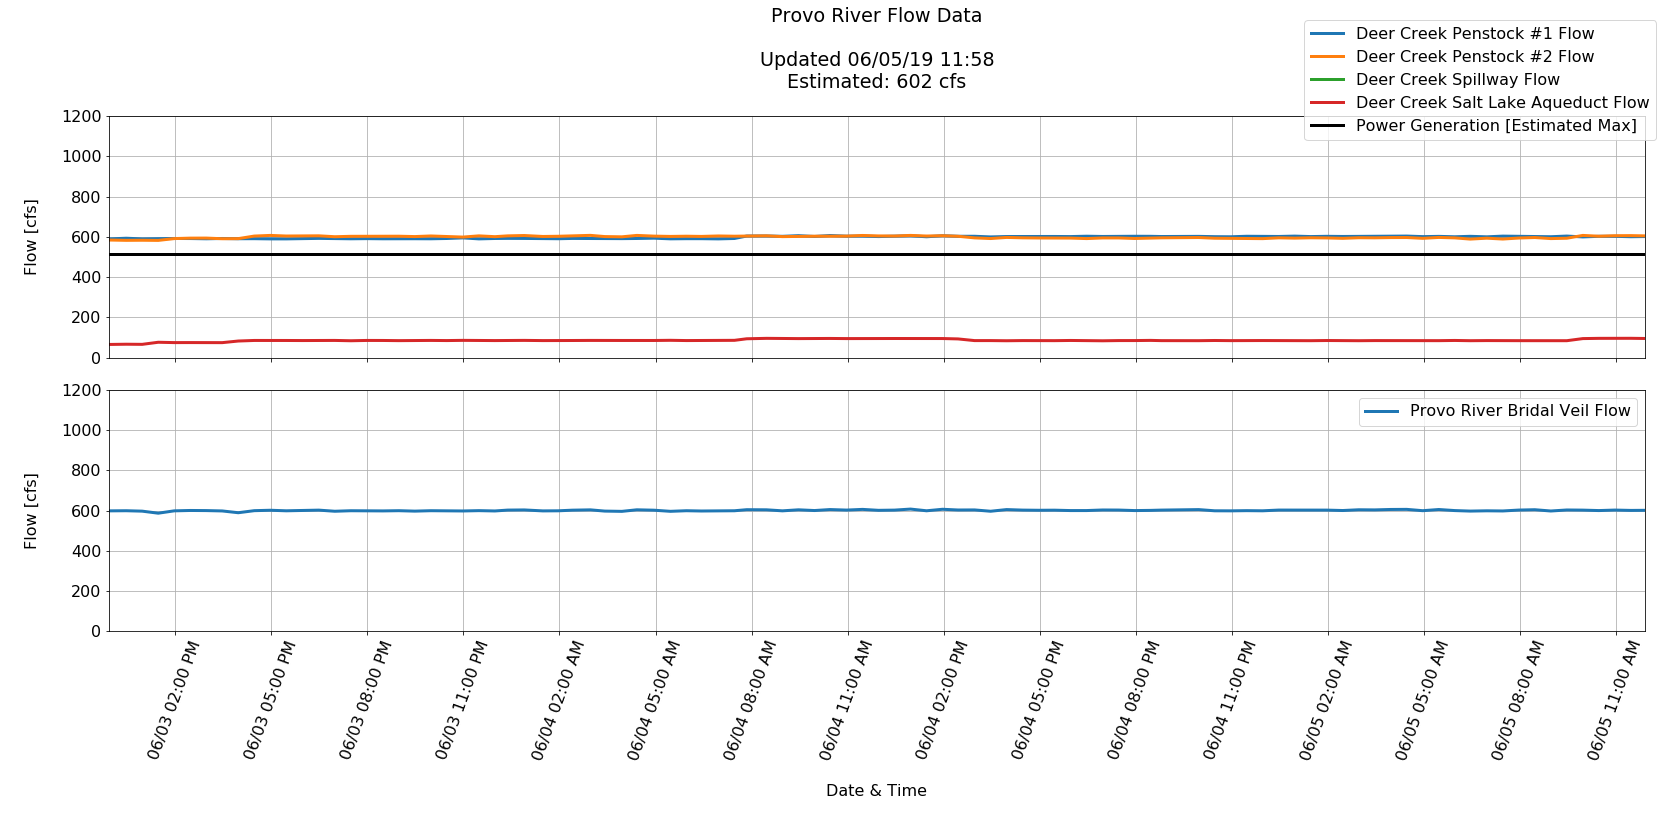

In [52]:
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.autolayout': False})

plotkeys = ['Deer Creek Penstock #1 Flow', 
            'Deer Creek Penstock #2 Flow', 
            'Deer Creek Spillway Flow', 
            'Deer Creek Salt Lake Aqueduct Flow', 
            'Provo River Bridal Veil Flow']

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(24,12), facecolor='w')
fig.subplots_adjust(wspace=0, hspace=0.05)
ax1, ax2 = ax

for k in plotkeys:
    ax = ax2 if k == 'Provo River Bridal Veil Flow' else ax1

    x, y = dd[k]['time'], dd[k]['value']
    ax.plot(x, y, linewidth='3', label=k)

powergen = 515.
ax1.axhline(y=powergen, linewidth=3, label='Power Generation [Estimated Max]', c='k')

for ax in [ax1, ax2]:
    ax.grid(True)
    ax.set_ylabel('\nFlow [cfs]\n')
    ax.set_ylim([0, 1200])

# t0 = dd['Provo River Bridal Veil Flow']['time'][0]
# t0 = t0 - timedelta(minutes=t0.minute % 5, seconds=t0.second, microseconds=t0.microsecond)
# t0 = t0 + timedelta(minutes=5)

tf = dd['Provo River Bridal Veil Flow']['time'][-1]
tf =  tf - timedelta(minutes=tf.minute % 5, seconds=tf.second, microseconds=tf.microsecond)

t0 = tf - timedelta(days=2)

ax.set_xlim([t0, tf])

mins = mdates.HourLocator(interval=3)
fmt = mdates.DateFormatter('%m/%d %I:%M %p')
ax.xaxis.set_major_locator(mins)
ax.xaxis.set_major_formatter(fmt)
plt.xticks(rotation=70)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax2.set_xlabel('\nDate & Time\n')

# Put a legend to the right of the current axis
ax1.legend(loc='upper left', bbox_to_anchor=(0.773, 1.43))
ax2.legend(loc='upper right')

ax1.set_title('Provo River Flow Data\n\nUpdated %s\nEstimated: %.0f cfs\n'%(
    dd['Provo River Bridal Veil Flow']['time'][-1].strftime('%m/%d/%y %H:%M'), 
    dd['Provo River Bridal Veil Flow']['value'][-1]))

plt.tight_layout()

plt.show()